In [1]:
import models
import numpy as np
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<Axes: >

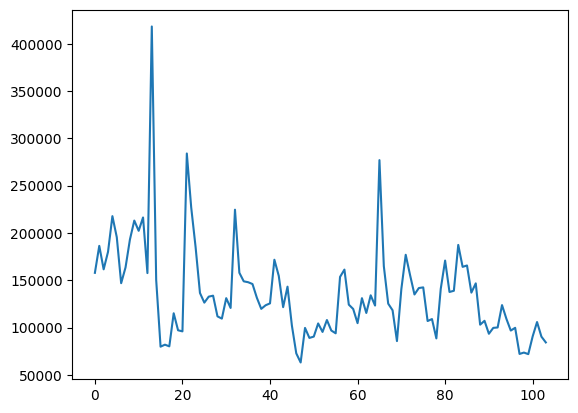

In [2]:
media = models.load_media()
revenue = media['revenue']
# plot the revenue
revenue.plot()


157707.28
136490.19067307696


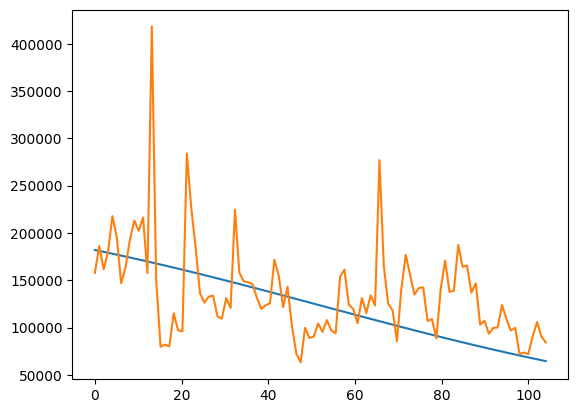

In [3]:
n = len(revenue)
t = np.linspace(0, n, n)
# value in the middle of the range
t0 = t[len(revenue) // 2]
third_quantile = revenue.quantile(0.75)
print(third_quantile)
mean = revenue.mean()
print(mean)
max = revenue.max()
capacity_coeff = 1.8
capacity = mean * capacity_coeff
growth_rate = -0.02
trend = models.logistic_curve(t, capacity, growth_rate, t0)

# plot the logistic curve
plt.plot(t, trend)
plt.plot(t, revenue)

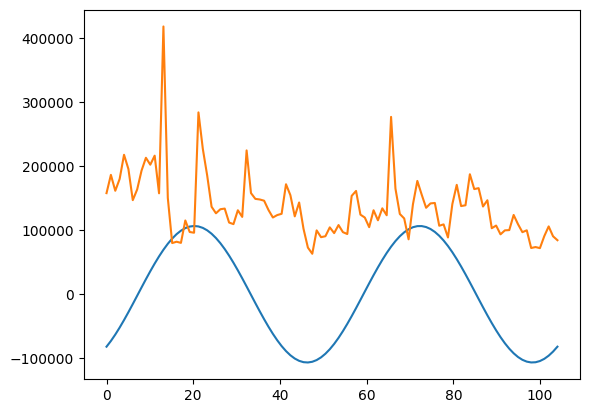

In [33]:
# model cyclic component

# summer low, winter high

base = 0
cos_ceof = -6
sin_coef = 5
period=52
year = models.cyclic_component(t, base,cos_ceof,sin_coef,period=period)
cycle_coeff = 0.1
year = year * cycle_coeff * mean
plt.plot(t, year)
plt.plot(t, revenue)
    

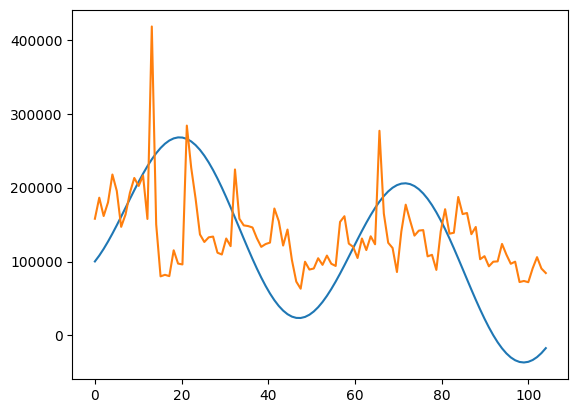

In [55]:
res = trend + year

plt.plot(t, res)
plt.plot(t, revenue)

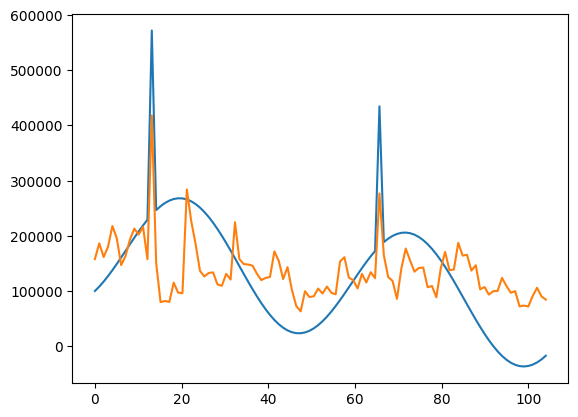

In [57]:
# black friday

def black_friday(t, coef, offset=13):
    res = np.zeros(len(t))
    for i in range(len(t)):
        if i % 52 == offset:
            res[i] = coef * t[i]
    return res

bf = black_friday(res, 0.5)
res = res + bf
plt.plot(t, res)
plt.plot(t, revenue)

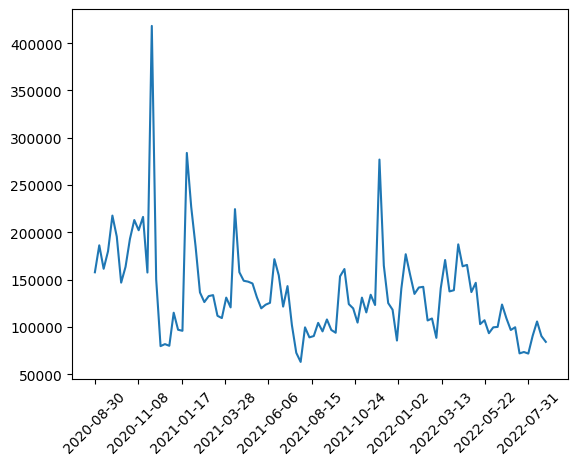

In [6]:
plt.plot(t, revenue)
dates = media['start_of_week']
plt.xticks(np.arange(0, len(dates), 10), dates.dt.date[::10], rotation=45)
plt.show()

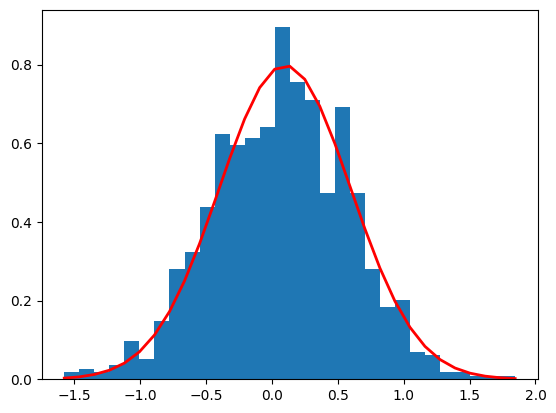

In [7]:
# plot normal distribution (numpy.random.normal)
mu=0.1
sigma=0.5

x = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [8]:
# model delay
media = models.load_media()
media = models.delay(media, default_lag=0, retention_rate=0.5, retention_length=4)
models.plot_media(media)

TypeError: delay() got an unexpected keyword argument 'default_lag'

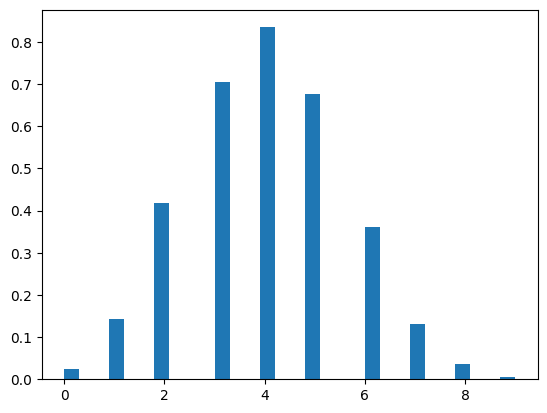

In [ ]:
# show binomial distribution
n = 10
k = 4
p = k/n
s = np.random.binomial(n, p, 5000)
# convert to elements between 0 and 1


count, bins, ignored = plt.hist(s, 30, density=True)
plt.show()

Adstock Weights: [0.13421773 0.4096     0.8        1.         0.8       ]
Adstocked Spend Data: [ 25.44676789  82.70199563 165.40399126 261.13473205 361.13473205
 461.13473205 484.79442839 463.92228093 404.87998164 300.38975491
 202.78754888]


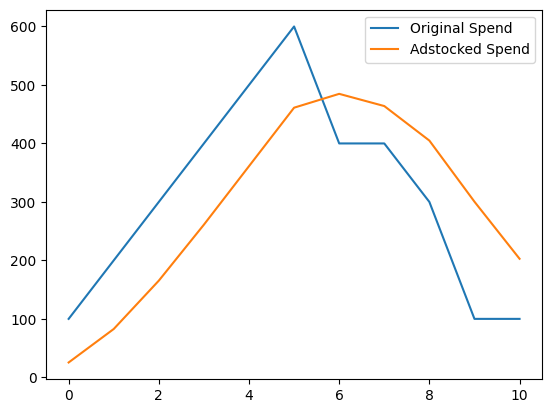

In [20]:
import numpy as np

# Example spend data (replace with your actual data)
spend_data = np.array([100, 200, 300, 400, 500, 600, 400, 400, 300, 100, 100])

# Parameters for delayed_adstock
alpha = 0.8  # decay parameter
theta = 3  # lag parameter
L = 5        # length of the weight series

# Generate adstock weights
weights = models.delayed_adstock(alpha, theta, L)

print("Adstock Weights:", weights)

# Function to apply adstock effect to spend data
def apply_delayed_adstock(spend_data, weights):
    # Ensure weights sum to 1
    weights /= weights.sum()
    
    # Calculate the weighted sum using convolution
    adstocked_spend = np.convolve(spend_data, weights[::-1], mode='full')[:len(spend_data)]
    
    return adstocked_spend

# Apply the adstock function to the spend data
adstocked_spend_data = apply_delayed_adstock(spend_data, weights)

print("Adstocked Spend Data:", adstocked_spend_data)

# plot the adstocked spend data
plt.plot(spend_data, label='Original Spend')
plt.plot(adstocked_spend_data, label='Adstocked Spend')
plt.legend()
plt.show()